jointgrid

JointGrid - это класс из библиотеки seaborn, который позволяет создавать комбинированные графики, отображающие как совместное распределение двух переменных, так и их отдельные распределения.

Функция sns.jointplot() представляет собой высокоуровневую оболочку для класса JointGrid, упрощая создание комбинированных графиков. Фактически, sns.jointplot() создает экземпляр JointGrid и использует его методы для построения графиков.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class seaborn.JointGrid(data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)

sns.JointGrid()

Параметры класса JointGrid:

1) data: DataFrame, массив;
2) x, y: переменные для осей X и Y, соответственно;
3) hue: переменная для разделения данных по цветам;
4) height: высота графика в дюймах (по умолчанию height=6);
5) ratio: отношение высоты боковых графиков к высоте основного графика (по умолчанию ratio=5);
6) space: расстояние между боковыми графиками и основным графиком (по умолчанию space=0.2);
7) palette:  палитра цветов для различных значений переменной hue;
8) hue_order: определяет порядок категорий, отображаемых на графике;
9) hue_norm: нормализует цветовую шкалу;
10) dropna: если True, пропущенные значения будут исключены из данных (по умолчанию dropna=False);
11) xlim: кортеж, определяющий пределы оси X;
12) ylim: кортеж, определяющий пределы оси Y;
13) marginal_ticks: словарь с ключевыми словами для настройки боковых графиков.

Основыные методы JointGrid:

1) plot: Метод для построения графиков. Обычно передаются функции для основного и дополнительных графиков.
В качестве первого аргумента указывается функция, отвечающая за построение основного графика, а в качестве второго - функция, которая будет использоваться для построения дополнительных подграфиков.
3) plot_joint: Построение основного графика.
4) plot_marginals: Построение дополнительных графиков.
5) set_axis_labels: Установка меток осей.
6) refline: Добавление линии на график.
7) savefig: Сохранение графика.
8) ax_joint: Основная ось для общего графика.
9) ax_marg_x: Ось для дополнительного графика по оси X.
10) ax_marg_y: Ось для дополнительного графика по оси Y.

In [10]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


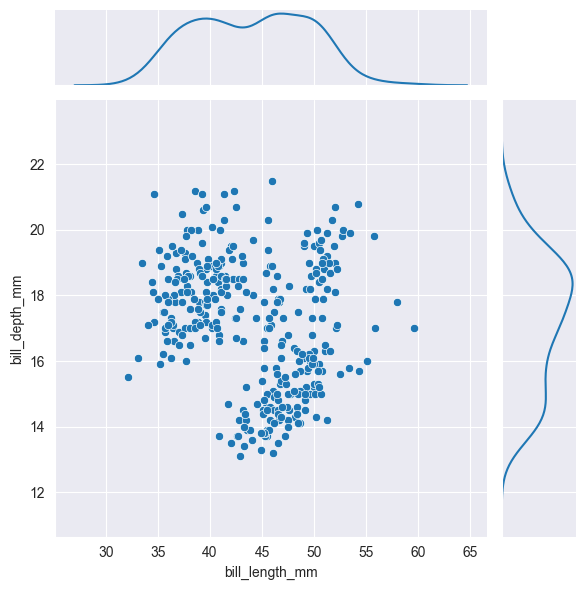

In [21]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.scatterplot, sns.kdeplot);

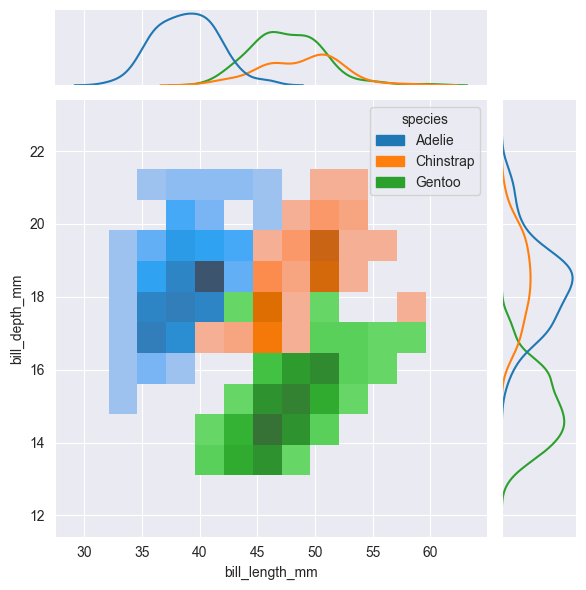

In [33]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                  hue='species')

g.plot(sns.histplot, sns.kdeplot);

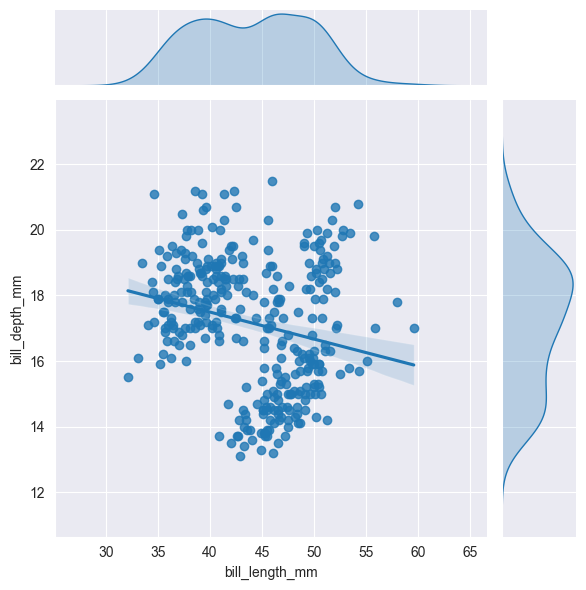

In [35]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot, fill=True);

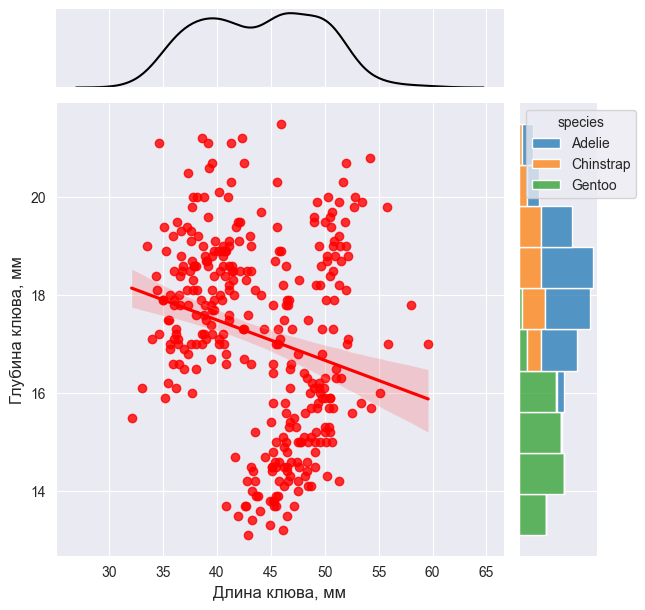

In [57]:
g = sns.JointGrid()
x = 'bill_length_mm'
y = 'bill_depth_mm'

sns.regplot(data=penguins, x=x, y=y,
            ax=g.ax_joint,
            color='red')

sns.kdeplot(data=penguins, x=x,
            ax=g.ax_marg_x,
            color='black')

sns.histplot(data=penguins, y=y,
            ax=g.ax_marg_y,
            hue='species',
            multiple='stack')

g.set_axis_labels(xlabel='Длина клюва, мм', 
                  ylabel='Глубина клюва, мм',
                  fontsize=12);